highpass 

https://stackoverflow.com/questions/39032325/python-high-pass-filter

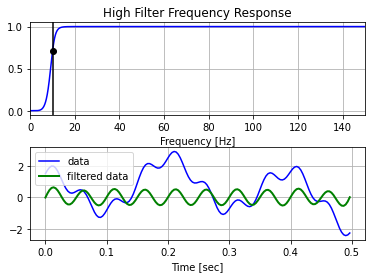

In [3]:
import scipy
import sys  
from scipy import signal
from scipy import pi
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np    
from scipy.signal import butter, lfilter, freqz   


# ----- ----- ----- -----    
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# ----- -----    
# (1)
def foo(sel):
    if (sel == 1):
        # Filter requirements.
        order = 6
        fs = 300.0  # sample rate, Hz
        cutoff = 10  # desired cutoff frequency of the filter, Hz

        # Get the filter coefficients so we can check its frequency response.
        b, a = butter_highpass(cutoff, fs, order)

        # Plot the frequency response.
        w, h = freqz(b, a, worN=8000)
        plt.subplot(2, 1, 1)
        plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
        plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
        plt.axvline(cutoff, color='k')
        plt.xlim(0, 0.5 * fs)
        plt.title("High Filter Frequency Response")
        plt.xlabel('Frequency [Hz]')
        plt.grid()

        # Demonstrate the use of the filter.
        # First make some data to be filtered.
        T = 0.5  # seconds
        n = int(T * fs)  # total number of samples
        t = np.linspace(0, T, n, endpoint=False)
        # "Noisy" data.  We want to recover the 20 Hz signal from this.
        data = np.sin(1.2 * 2 * np.pi * t) + 1.5 * np.cos(5 * 2 * np.pi * t) + 0.5 * np.sin(20.0 * 2 * np.pi * t)

        # Filter the data, and plot both the original and filtered signals.
        y = butter_highpass_filter(data, cutoff, fs, order)

        plt.subplot(2, 1, 2)
        plt.plot(t, data, 'b-', label='data')
        plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
        plt.xlabel('Time [sec]')
        plt.grid()
        plt.legend()

        plt.subplots_adjust(hspace=0.35)
        plt.show()
    else:
        print ('Please, choose among choices, thanks.')


# ----- -----
def main():
    # sel = int (sys.argv[1])
    sel = int (1)
    foo(sel)


# ----- ----- ----- ----- ----- -----
if __name__ == '__main__':
    main()